## Import Required Libraries 

In [2]:
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind, zscore
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from statsmodels.discrete.discrete_model import Probit, Logit
from statsmodels.tools import add_constant
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Patch

## Read and Load Data

In [3]:
df = pd.read_csv('mosleh_et_al_data.csv')
df

,politics_sites2,politics_sites1,politics_followed,lowqual_pr2019_crowd,lowqual_pr2019_fc,lowqual_afm,lowqual_mbfc,lowqual_lasser2019,suspended,politics_hashtag,...,valence_neg,valence_neu,valence_pos,politics_sites2_ideo_std,hashtag_ideo_std,barbera_std,politics_sites1_std,repeated_tweet_count,freq_pr_1h,bad_domain_count
0,-0.231902,-1.168745,-0.080295,0.598883,0.279221,0.185315,0.292807,0.350000,0,0,...,0.109935,0.813230,0.076835,0.274317,0.00000,0.909460,69,86.0,30,7
1,0.405261,1.060905,2.296375,0.774873,0.848639,0.614156,0.513147,0.975087,0,1,...,0.115985,0.793715,0.090250,0.351800,0.00000,0.157056,623,133.0,26,20
2,-0.171067,-0.500076,-2.312730,0.548727,0.242347,0.130950,0.242445,0.300000,0,0,...,0.085765,0.817340,0.096915,0.279591,0.00000,0.445349,32,3.0,3,6
3,-0.085814,-0.748035,-1.507481,0.611501,0.360119,0.180055,0.277793,0.316038,0,0,...,0.108680,0.781135,0.110190,0.290277,0.00000,0.256665,55,104.0,29,22
4,0.595367,1.347730,2.010573,0.700217,0.698661,0.430655,0.554609,0.763889,0,1,...,0.065145,0.860550,0.074320,0.300823,0.00000,0.431149,37,36.0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,-0.115066,-0.604443,NaN,0.559728,0.257015,0.167228,0.473955,0.336758,1,0,...,0.087090,0.863170,0.049770,0.206279,0.00000,NaN,134,724.0,22,3
8996,0.499673,1.019845,1.689321,0.703698,0.720918,0.399594,0.568832,0.772321,1,1,...,0.067430,0.843105,0.089495,0.300414,0.00000,0.890596,66,71.0,27,14
8997,-0.214569,-0.925605,NaN,0.627648,0.400227,0.217915,0.303897,0.355212,1,0,...,0.083680,0.849685,0.066635,0.283650,0.57735,NaN,240,99.0,22,46
8998,0.424927,0.925060,1.525494,0.764551,0.808780,0.388632,0.462972,0.863636,1,1,...,0.112050,0.808630,0.079320,0.332652,0.00000,0.900122,32,210.0,15,22


## Twitter Suspensions after the 2020 Election

### Creating a Crosstab with `pd.crosstab`
**Why I used It?**  
`pd.crosstab` is used to compute a frequency table between two categorical variables so it was the quickest way examine the relationship between two variables (e.g., which accounts using political hashtags are more likely to be suspended).

In [13]:
crosstab = pd.crosstab(df['politics_hashtag'], df['suspended'])
print("Crosstab:")
crosstab

Crosstab:


suspended,0,1
politics_hashtag,,
0,4295,200
1,3623,882


### Calculating Odds Ratio and Performing a Chi-Square Test

1. **Calculate Proportions**:
   - Used the `crosstab` to compute the proportion of suspended accounts for each category of `politics_hashtag`:
     - Proportion for `politics_hashtag = 1` (Trump-related hashtags).
     - Proportion for `politics_hashtag = 0` (Biden-related hashtags).

2. **Calculate Odds Ratio**:
   - Divided the proportion of suspended accounts in one category by the proportion in the other to get the odds ratio, quantifying the relative likelihood of suspension.

3. **Perform Chi-Square Test**:
   - Used the `chi2_contingency` function to test the association between `politics_hashtag` and `suspended`.
   - Extracted the Chi-square statistic, p-value, degrees of freedom, and the expected frequency table to interpret the results.



In [5]:
# Calculate odds ratio (proportions)
proportion_trump = crosstab.loc[1, 1] / crosstab.loc[1].sum()
proportion_biden = crosstab.loc[0, 1] / crosstab.loc[0].sum()
odds_ratio = proportion_trump / proportion_biden
# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(crosstab)

In [6]:
print(f"Odds Ratio: {odds_ratio:.2f}")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Odds Ratio: 4.40
Chi-Square Statistic: 485.47
P-Value: 1.3808204811294585e-107
Degrees of Freedom: 1
Expected Frequencies:
[[3954.60111111  540.39888889]
 [3963.39888889  541.60111111]]


In [7]:
# Conclusion
if p < 0.05:
    print("There is a statistically significant difference in suspension rates.")
else:
    print("There is no statistically significant difference in suspension rates.")

There is a statistically significant difference in suspension rates.


## Distributions of Relative Frequency of Low Quality

In [8]:
data_df = df.copy()
df_new = data_df.copy()

In [9]:
def distribution_plot(df, column_name, title):
    # Ensure numeric and clean data
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    # df[column_name] = df[column_name].fillna(0)

    # Calculate Z-scores for low-quality news sharing
    df[column_name] = (df[column_name] - df[column_name].mean()) / df[column_name].std()

    # Plot KDE distributions with combined normalization
    plt.figure(figsize=(10, 6))
    sns.kdeplot(
        data=df,
        x = column_name,
        hue = 'politics_hashtag',
        fill = True,  # Replaces deprecated 'shade=True'
        common_norm = True,  # Normalize combined area to 1
        # weights = 'weights',
        alpha = 0.5,
        palette=['lightblue', 'lightcoral']
    )
    labels = ['Trump hashtags', 'Biden hashtags']
    # plt.title(f'{title}: Relative Frequency of Low-quality News Sharing (Combined)', fontsize=14)
    plt.xlabel('Low-quality News Sharing', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)  # Adjust Y-axis label for clarity
    plt.legend(title='People who shared', fontsize=10, title_fontsize=12, labels=labels)
    plt.tight_layout()

    # Save and display the plot
    plt.show()

### Plotting Distributions of Relative Frequency of Low-Quality News Sharing

1. **Function Definition**:
   - Created a reusable function `distribution_plot` to visualize the distribution of relative frequency of low-quality news sharing for different categories of `politics_hashtag`.

2. **Data Preprocessing**:
   - Ensured the data in the specified `column_name` was numeric using `pd.to_numeric`, handling any non-numeric entries.
   - Standardized the column data using Z-scores to make the distributions comparable by subtracting the mean and dividing by the standard deviation.

3. **Kernel Density Estimation (KDE) Plot**:
   - Used `sns.kdeplot` to create a smooth representation of the data distribution.
   - Plotted the distribution for each category of `politics_hashtag` with a different color and added a legend for clarity.

4. **Labels and Aesthetics**:
   - Added appropriate labels for the x-axis and y-axis, indicating the measure of low-quality news sharing and its frequency.
   - Used a legend to differentiate between groups (e.g., "Trump hashtags" and "Biden hashtags").

5. **Plot Execution**:
   - Called the `distribution_plot` function twice to visualize:
     - `lowqual_pr2019_fc`: Distribution for professional fact-checkers.
     - `lowqual_pr2019_crowd`: Distribution for crowdsourcing participants.

6. **Visualization**:
   - Displayed the plots with the KDE curves for each group, comparing the relative frequencies of low-quality news sharing.

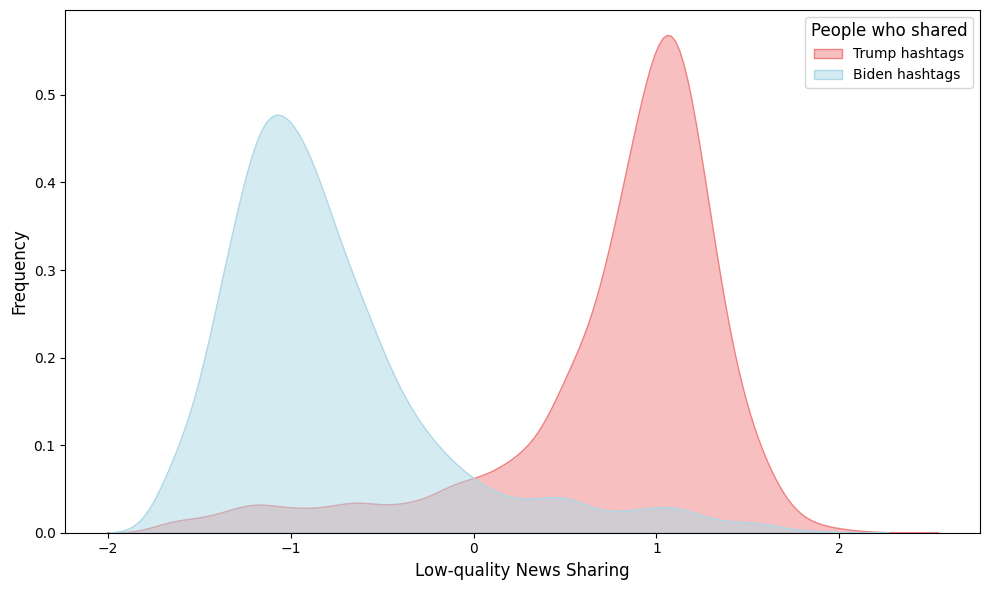

In [10]:
distribution_plot(df, 'lowqual_pr2019_fc', 'Professional fact-checkers')

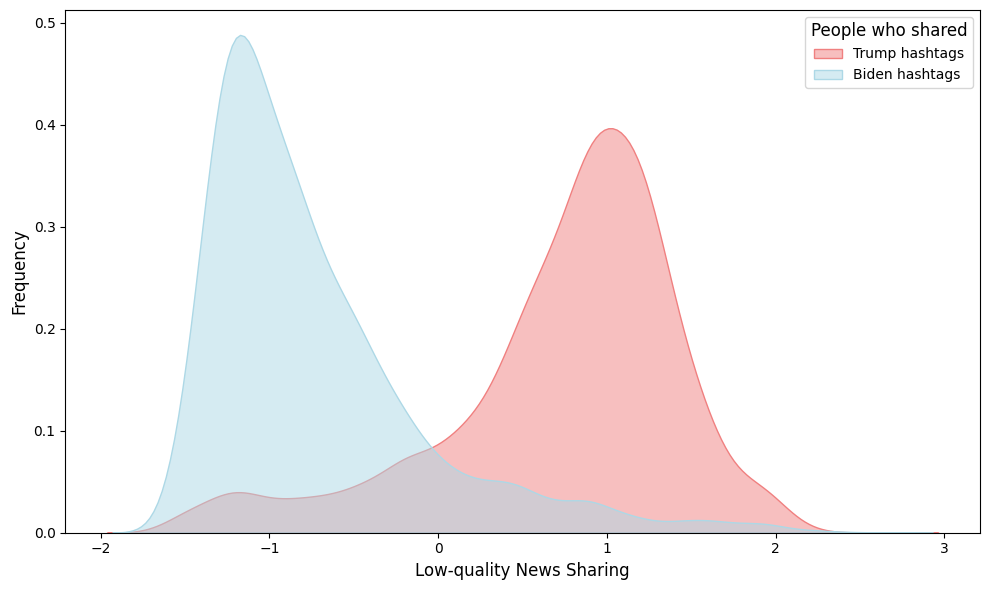

In [11]:
distribution_plot(df, 'lowqual_pr2019_crowd', 'Crowdsourcing Participants')

## Low-quality News Sharing on Twitter

### Computing Effect Sizes and Performing t-Tests

1. **Function Definition**:
   - Defined a function `compute_effect_sizes_and_ttest` to compute effect sizes (Cohen's d and Hedges' g) and perform a two-sample t-test.

2. **Data Splitting**:
   - Divided the data into two groups based on the `group_col` (`politics_hashtag`), one for each category (e.g., 1 = Trump hashtags, 0 = Biden hashtags).

3. **Effect Size Calculations**:
   - **Pooled Standard Deviation**:
     - Calculated a pooled standard deviation combining the variance of both groups.
   - **Cohen's d**:
     - Measured the standardized mean difference between the two groups.
   - **Hedges' g**:
     - Applied a correction to Cohen's d for smaller sample sizes to reduce bias.

4. **t-Test**:
   - Used a two-sample t-test (`ttest_ind`) assuming equal variances to assess if the mean difference between the groups is statistically significant.
   - Extracted the t-statistic and p-value from the test.

5. **Analysis Execution**:
   - Called the function for multiple columns (`lowqual_pr2019_fc`, `lowqual_afm`, `lowqual_mbfc`, etc.) to compute effect sizes and perform t-tests for each measure of low-quality news sharing.

6. **Results Summary**:
   - Printed the t-statistic, p-value, Cohen's d, and Hedges' g for each analysis, allowing comparison of group differences and effect sizes across measures.

7. **Interpretation**:
   - Used the p-value to determine statistical significance.
   - Cohen's d and Hedges' g provided insight into the practical significance of the observed differences.


In [12]:
def compute_effect_sizes_and_ttest(df, column, group_col='politics_hashtag'):
    # Split the data into two groups
    group1 = df[df[group_col] == 1][column].dropna()
    group2 = df[df[group_col] == 0][column].dropna()
    
    # Compute means and sample sizes
    n1, n2 = len(group1), len(group2)
    mean1, mean2 = group1.mean(), group2.mean()
    
    # Compute variances
    var1, var2 = group1.var(ddof=1), group2.var(ddof=1)
    
    # Compute pooled standard deviation
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    
    # Compute Cohen's d
    cohens_d = (mean1 - mean2) / pooled_std
    
    # Compute Hedges' g
    correction = 1 - (3 / (4 * (n1 + n2) - 9))
    hedges_g = cohens_d * correction
    
    # Perform two-sample t-test
    t_stat, p_value = ttest_ind(group1, group2, equal_var=True)
    
    print(f"Analysis for: {column}")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_value:.4e}")
    print(f"Cohen's d: {cohens_d:.4f}")
    print(f"Hedges' g: {hedges_g:.4f}\n")
    print()

In [12]:
compute_effect_sizes_and_ttest(data_df, 'lowqual_pr2019_fc', group_col='politics_hashtag')
compute_effect_sizes_and_ttest(data_df, 'lowqual_afm', group_col='politics_hashtag')
compute_effect_sizes_and_ttest(data_df, 'lowqual_mbfc', group_col='politics_hashtag')
compute_effect_sizes_and_ttest(data_df, 'lowqual_lasser2019', group_col='politics_hashtag')
compute_effect_sizes_and_ttest(data_df, 'lowqual_pr2019_crowd', group_col='politics_hashtag')
compute_effect_sizes_and_ttest(data_df, 'lowqual_pr2019_crowdrep', group_col='politics_hashtag')

Analysis for: lowqual_pr2019_fc
t-statistic: 119.2233
p-value: 0.0000e+00
Cohen's d: 2.5212
Hedges' g: 2.5210


Analysis for: lowqual_afm
t-statistic: 102.6777
p-value: 0.0000e+00
Cohen's d: 2.1649
Hedges' g: 2.1647


Analysis for: lowqual_mbfc
t-statistic: 97.5922
p-value: 0.0000e+00
Cohen's d: 2.0575
Hedges' g: 2.0574


Analysis for: lowqual_lasser2019
t-statistic: 102.6337
p-value: 0.0000e+00
Cohen's d: 2.1638
Hedges' g: 2.1637


Analysis for: lowqual_pr2019_crowd
t-statistic: 102.4640
p-value: 0.0000e+00
Cohen's d: 2.1668
Hedges' g: 2.1666


Analysis for: lowqual_pr2019_crowdrep
t-statistic: 61.0715
p-value: 0.0000e+00
Cohen's d: 1.2915
Hedges' g: 1.2914




### Sharing Lower-quality News Sources and Conservative Ideology

### Analyzing Correlations Between Low-Quality News Sharing and Political Ideology

1. **Column Specification**:
   - Defined two sets of columns:
     - `low_quality_columns`: Variables measuring low-quality news sharing.
     - `political_ideology_columns`: Variables related to political ideology (e.g., followed accounts, hashtags, political sites).

2. **Correlation Matrix**:
   - Combined the two groups of columns and computed the correlation matrix using `.corr()`.
   - Extracted the subset of correlations between `low_quality_columns` and `political_ideology_columns` for focused analysis.

3. **Heatmap Plotting**:
   - Used `sns.heatmap` to visualize the correlations:
     - Rows represent low-quality news measures.
     - Columns represent political ideology indicators.
   - Added annotations (`annot=True`) to display the exact correlation values.

4. **Plot Customization**:
   - Adjusted the size and layout to ensure readability.
   - Rotated x-axis labels slightly for better visualization.

5. **Results Interpretation**:
   - The heatmap highlights the strength and direction of relationships between low-quality news sharing and various political ideology measures.
   - Positive correlations indicate alignment (e.g., higher low-quality news sharing with specific political behaviors), while negative correlations suggest an inverse relationship.

In [13]:
# Specify the columns
low_quality_columns = [
    'lowqual_pr2019_fc',
    'lowqual_lasser2019',
    'lowqual_mbfc',
    'lowqual_afm',
    'lowqual_pr2019_crowd',
    'lowqual_pr2019_crowdrep'
]
political_ideology_columns = [
    'politics_followed',
    'politics_hashtag',
    'politics_sites1',
    'politics_sites2'
]

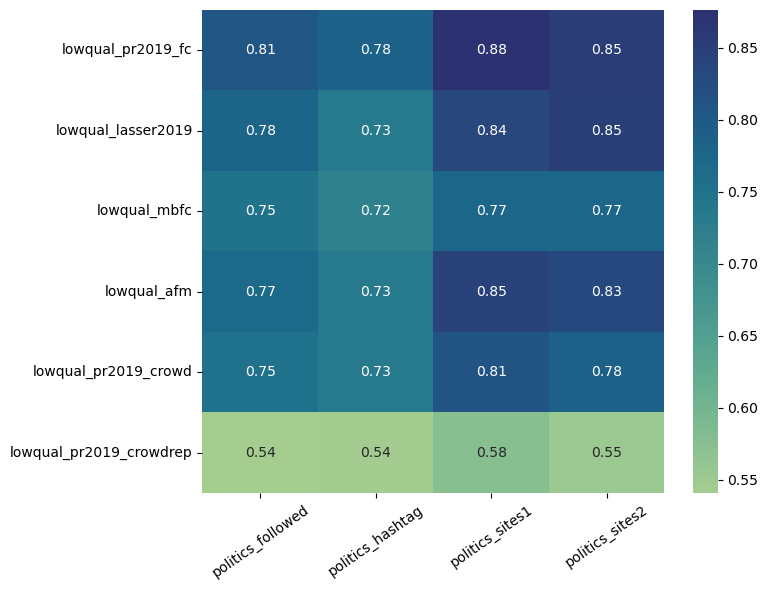

In [14]:
# Create a correlation matrix
correlation_matrix = data_df[low_quality_columns + political_ideology_columns].corr()
    
# Extract the correlations between the two groups
heatmap_data = correlation_matrix.loc[low_quality_columns, political_ideology_columns]
    
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".2f", 
    cmap="crest", 
    cbar_kws={},
    annot_kws={"weight": "normal", "size": 10},
    # linewidths=0.5
)
# plt.title("Correlation Between Low-quality News and Political Ideology")
# plt.xlabel("Political Ideology")
# plt.ylabel("Low-quality News Sharing")
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

## News Sharing Can Help Explain Suspension, Using Single Predictors

### Analyzing Predictors of Account Suspension and Visualizing Results

1. **Function Definition**:
   - Defined the function `analyze_predictors` to calculate the predictive power (AUC) of various predictors for account suspension (`suspended`).
   - The AUC (Area Under the Curve) indicates the strength of the predictor in distinguishing between suspended and non-suspended accounts.

2. **Bootstrap Sampling**:
   - Applied bootstrap resampling to repeatedly sample data and compute AUC for each predictor, ensuring robustness and estimating confidence intervals (CIs).

3. **Probit Model Fitting**:
   - Used the Probit regression model to predict the likelihood of suspension based on each predictor.
   - Handled missing or infinite values by cleaning the data before modeling.

4. **AUC Calculation**:
   - Computed AUC scores for each predictor using `roc_auc_score`.
   - Calculated the mean AUC and 95% confidence intervals (2.5th and 97.5th percentiles) for each predictor.

5. **Execution**:
   - Specified the predictors (`politics_hashtag`, `lowqual_afm`, etc.) and ran the analysis against the target variable (`suspended`).
   - Stored the results (Mean AUC, Lower CI, Upper CI) in a DataFrame for further analysis.

6. **Visualization**:
   - Created a bar chart to compare AUC scores for all predictors:
     - X-axis: Predictors.
     - Y-axis: Mean AUC scores.
     - Error bars: Represent the confidence intervals (Lower CI and Upper CI).
   - Used colors to distinguish two categories of predictors:
     - **Purple**: Predictors related to political orientation.
     - **Green**: Predictors related to low-quality news sharing.
   - Added a legend to explain the color coding.

7. **Plot Customization**:
   - Adjusted x-axis labels for readability by wrapping text.
   - Limited the y-axis range to focus on meaningful AUC values (0.5 to 0.8).
   - Used error bars to highlight the uncertainty in AUC estimates.

8. **Results Interpretation**:
   - The bar chart illustrates the relative importance of predictors in explaining account suspension.
   - Predictors with higher AUC scores are better at distinguishing suspended accounts, while the width of error bars reflects confidence in these estimates.

In [15]:
def analyze_predictors(df, predictors, target, n_bootstrap=100):
    def compute_auc_with_bootstrap(df, predictor, target, n_bootstrap=100):
        auc_scores = []
        for _ in range(n_bootstrap):
            # Bootstrap resampling
            resampled_df = df.sample(frac=1, replace=True, random_state=np.random.randint(0, 10000))
                
            # Prepare data for the Probit model
            X = add_constant(resampled_df[[predictor]])
            y = resampled_df[target]

            # Remove rows with NaN or infinite values
            clean_data = pd.concat([X, y], axis=1).replace([np.inf, -np.inf], np.nan).dropna()
            X = clean_data[[predictor]]
            y = clean_data[target]

            # Add constant back after cleaning
            X = add_constant(X)

            # Fit Probit model
            try:
                model = Probit(y, X).fit(disp=0)
            except Exception as e:
                print(f"Error fitting model for predictor {predictor}: {e}")
                continue
                
            # Predict probabilities
            y_pred = model.predict(X)
                
            # Compute AUC
            try:
                auc = roc_auc_score(y, y_pred)
                auc_scores.append(auc)
            except ValueError as e:
                print(f"Error computing AUC for predictor {predictor}: {e}")
                continue
            
            # Calculate mean AUC and 95% confidence intervals
            mean_auc = np.mean(auc_scores) if auc_scores else np.nan
            lower_ci = np.percentile(auc_scores, 2.5) if auc_scores else np.nan
            upper_ci = np.percentile(auc_scores, 97.5) if auc_scores else np.nan
        return mean_auc, lower_ci, upper_ci
    results = []
    for predictor in predictors:
        mean_auc, lower_ci, upper_ci = compute_auc_with_bootstrap(df, predictor, target, n_bootstrap)
        results.append({
            'Predictor': predictor,
            'Mean AUC': mean_auc,
            'Lower CI': lower_ci,
            'Upper CI': upper_ci
        })
    return pd.DataFrame(results)
predictors = [
    'politics_hashtag', 'politics_sites1', 'politics_sites2', 'politics_followed',
    'lowqual_afm', 'lowqual_mbfc', 'lowqual_lasser2019', 'lowqual_pr2019_fc', 'lowqual_pr2019_crowd'
    ]

In [16]:
results = analyze_predictors(df_new, predictors, target = 'suspended')

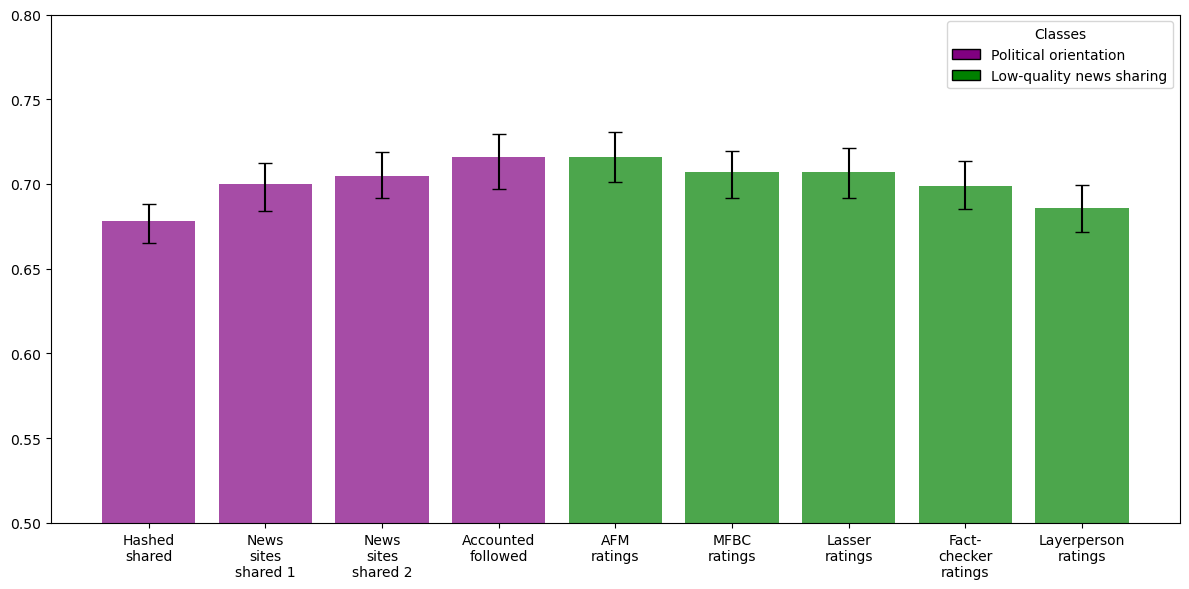

In [17]:
# Create bar chart with error bars
plt.figure(figsize=(12, 6))
x = range(len(results))
y = results['Mean AUC']
yerr = [
    results['Mean AUC'] - results['Lower CI'],
    results['Upper CI'] - results['Mean AUC']
]
colors = ['purple' if i < 4 else 'green' for i in x]
bars = plt.bar(x, y, yerr=yerr, capsize=5, alpha=0.7, color=colors)
# plt.bar(x, y, yerr=yerr, capsize=5, alpha=0.7, color=['purple' if i < 4 else 'green' for i in x])
plt.xticks(x, ['Hashed\nshared', 'News\nsites\nshared 1', 'News\nsites\nshared 2', 
               'Accounted\nfollowed', 'AFM\nratings', 'MFBC\nratings', 
               'Lasser\nratings', 'Fact-\nchecker\nratings', 'Layerperson\nratings'], )
# plt.ylabel('AUC')
# plt.title('AUC with Confidence Intervals for Each Predictor')
plt.ylim(0.5, 0.8)
legend_elements = [
    Patch(facecolor='purple', edgecolor='black', label='Political orientation'),
    Patch(facecolor='green', edgecolor='black', label='Low-quality news sharing')
]
plt.legend(title='Classes', handles=legend_elements)
plt.tight_layout()
plt.show()

## News Sharing Can Help Explain Suspension, Using Multiple Predictors

### Step 8: Data Transformation, PCA, and Regression Analysis

#### **Data Preprocessing**
1. **Handle Missing Values**:
   - Replaced missing values in the dataset with column means using `.fillna()`.

2. **Log Transformation**:
   - Applied log transformation to selected columns (e.g., `num_followers`, `num_friends`) to reduce skewness.

3. **Winsorization**:
   - Limited extreme values in specific columns to the 1st and 99th percentiles using the `winsorize` function.

---

#### **Principal Component Analysis (PCA)**
1. **Purpose**:
   - Reduced dimensionality for groups of related variables to create composite indicators.

2. **Execution**:
   - Performed PCA on various variable groups:
     - Misinfo indicators (e.g., `lowqual_pr2019_fc`).
     - Political variables (e.g., `politics_hashtag`).
     - Follower features (e.g., `log_num_followers`).
     - Harmful language variables (e.g., `jigsaw_toxicity`).
     - Valence (e.g., `valence_neg`).

3. **Output**:
   - Added PCA components to the dataset, with explained variance ratios printed for each group.

4. **New Variables**:
   - Examples: `pc1_politics`, `pc1_misinfo`, `pc1_harmful_language`, etc.
   - Created `extremity` as the absolute value of `pc1_politics`.

---

#### **Standardization**
1. **Purpose**:
   - Standardized independent variables using Z-scores to ensure comparability.

2. **Execution**:
   - Applied standardization to all independent variables.

---

#### **Regression Models**
1. **Probit and Logit Models**:
   - Fitted Probit and Logit regression models to predict `suspended` based on standardized predictors.

2. **Significance Testing**:
   - Extracted p-values from both models to assess the significance of each predictor.

---

#### **Multiple Testing Correction**
1. **Bonferroni Correction**:
   - Multiplied p-values by the number of tests to control the family-wise error rate.

2. **Holm-Bonferroni Correction**:
   - Sequentially adjusted p-values to maintain the overall significance level.

---

#### **Results Compilation**
1. **Probit Results**:
   - Created a DataFrame with original p-values, Bonferroni-adjusted p-values, and Holm-Bonferroni-adjusted p-values.

2. **Logit Results**:
   - Similarly compiled the results for the Logit model.

---

#### **Summary Outputs**
- **Probit Results**: Displayed the significance of predictors for the Probit model with adjustments.
- **Logit Results**: Displayed the adjusted p-values for predictors in the Logit model.

In [16]:
# Fill missing values with column means
data_filled = df_new.fillna(df_new.mean())

In [17]:
# Columns to log-transform
log_transformed_columns = {
    'repeated_tweet_count': 'log_repeated_tweet_count',
    'freq_pr_1h': 'log_freq_pr_1h',
    'num_followers': 'log_num_followers',
    'num_friends': 'log_num_friends'
}
    
for original, log_transformed in log_transformed_columns.items():
    data_filled[log_transformed] = np.log10(data_filled[original] + 1)

In [18]:
# Add the log_num_fol column
if 'num_friends' in data_filled.columns and 'num_followers' in data_filled.columns:
    data_filled['log_num_fol'] = np.log10((data_filled['num_friends'] + 1) / (data_filled['num_followers'] + 1))

In [19]:
# Winsorize variables at top 1% from both sides
vars_winsorize_both = [
    'valence_neg', 'valence_neu', 'valence_pos',
    'barbera_std', 'politics_sites1_std', 'politics_sites2_ideo_std'
]
for var in vars_winsorize_both:
    if var in data_filled.columns:
        data_filled[var] = winsorize(data_filled[var], limits=[0.01, 0.01])

In [20]:
# Winsorize variables at top 1% on the upper side only
vars_winsorize_upper = [
    'moral_outrage', 'rewire_abuse', 'rewire_hate', 'rewire_profanity',
    'rewire_violent', 'rewire_sexually_explicit',
    'jigsaw_toxicity', 'jigsaw_severe_toxicity', 'jigsaw_idenity_attack',
    'jigsaw_insult', 'jigsaw_profanity', 'jigsaw_threat'
]
for var in vars_winsorize_upper:
    if var in data_filled.columns:
        data_filled[var] = winsorize(data_filled[var], limits=[0, 0.01])

In [23]:
def pca_component(data, columns, prefix, n_components=1):
    # Filter the dataset to include only the specified variables
    pca_data = data[columns].copy()
    
    # Standardize the data
    scaler = StandardScaler()
    pca_data_scaled = scaler.fit_transform(pca_data)
    
    # Perform PCA
    pca = PCA(n_components=n_components)
    pca_components = pca.fit_transform(pca_data_scaled)

    # Explained variance ratio
    explained_variance = pca.explained_variance_ratio_
    print(f"Explained variance ratio for {prefix}: {explained_variance}")
    
    # Add the PCA components to the dataset
    for i in range(n_components):
        data[f'pc{i+1}_{prefix}'] = pca_components[:, i]
    return data

In [24]:
data_filled = pca_component(data_filled, 
                            ['lowqual_pr2019_fc', 'lowqual_afm', 
                             'lowqual_lasser2019', 'lowqual_mbfc'], 
                             'misinfo', n_components=1)
data_filled = pca_component(data_filled,
                            ['politics_hashtag', 'politics_followed',
                            'politics_sites1', 'politics_sites2'],
                            'politics', n_components=1)
data_filled['extremity'] = data_filled['pc1_politics'].abs()
data_filled = pca_component(data_filled, 
                            ['log_num_followers', 'log_num_friends',
                             'log_num_fol'],
                             'fol', n_components=1)
data_filled = pca_component(data_filled,
                            ['rewire_abuse', 'rewire_hate', 'rewire_profanity',
                            'rewire_violent', 'rewire_sexually_explicit', 'jigsaw_toxicity',
                            'jigsaw_severe_toxicity', 'jigsaw_idenity_attack', 'jigsaw_insult',
                            'jigsaw_profanity','jigsaw_threat'],
                            'harmful_language', n_components=3)
data_filled = pca_component(data_filled, 
                            ['valence_neg', 'valence_neu',
                             'valence_pos'],
                             'valence', n_components=1)

Explained variance ratio for misinfo: [0.87255953]
Explained variance ratio for politics: [0.87952937]
Explained variance ratio for fol: [0.70462969]
Explained variance ratio for harmful_language: [0.5616608  0.11871792 0.10703707]
Explained variance ratio for valence: [0.7079432]


In [25]:
independent_vars = [
    'pc1_politics', 'pc1_misinfo', 'pc1_fol', 
    'pc1_harmful_language', 'pc2_harmful_language', 'pc3_harmful_language',
    'pc1_valence', 'tweets_in_2wk', 'botsentinel_score', 
    'extremity', 'moral_outrage', 'liwc_political',
    'log_freq_pr_1h', 'log_repeated_tweet_count', 
    'barbera_std', 'politics_sites1_std', 'politics_sites2_ideo_std'
]
scaler = StandardScaler()
# Apply standardization (z-score) on the specified independent variables
data_filled[independent_vars] = scaler.fit_transform(data_filled[independent_vars])

In [26]:
X = data_filled[['pc1_politics', 'pc1_misinfo', 'pc1_fol', 
            'pc1_harmful_language', 'pc2_harmful_language', 'pc3_harmful_language',
            'pc1_valence', 'tweets_in_2wk', 'botsentinel_score', 'extremity',
            'moral_outrage', 'liwc_political', 'log_freq_pr_1h', 'log_repeated_tweet_count',
            'barbera_std', 'politics_sites1_std', 'politics_sites2_ideo_std']]
y = data_filled['suspended']

In [27]:
probit_model = Probit(y, X).fit()
logit_model = Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.667226
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.667162
         Iterations 4


In [28]:
# Get p-values from the probit and logit models
probit_p_values = probit_model.pvalues[1:]
logit_p_values = logit_model.pvalues[1:]

# Apply Bonferroni correction
bonferroni_probit_p = probit_p_values * len(probit_p_values)
bonferroni_logit_p = logit_p_values * len(logit_p_values)

In [29]:
def holm_bonferroni(p_values, alpha=0.05):
    # Sort p-values and get the corresponding indices
    sorted_p_values = np.sort(p_values)
    m = len(p_values)  # Number of tests
    
    # Initialize an array to hold the adjusted p-values
    adjusted_p_values = np.zeros(m)
    
    # Apply the Holm-Bonferroni correction
    for i in range(m):
        # Calculate the threshold for each sorted p-value
        threshold = alpha / (m - i)
        
        # Adjust the p-value if it is below the threshold
        adjusted_p_values[i] = sorted_p_values[i] * (m - i)
        
    # Return the adjusted p-values in their original order
    # Revert to the original order of p-values using sorted indices
    final_adjusted_p_values = np.zeros(m)
    final_adjusted_p_values[np.argsort(p_values)] = adjusted_p_values

    return final_adjusted_p_values

In [30]:
holm_probit_p = holm_bonferroni(probit_p_values)
holm_logit_p = holm_bonferroni(logit_p_values)

In [31]:
probit_results = pd.DataFrame({
    'Probit p-value': probit_p_values,
    'Bonferroni Probit p-value': bonferroni_probit_p,
    'Holm-Bonferroni Probit p-value': holm_probit_p
})
probit_results

,Probit p-value,Bonferroni Probit p-value,Holm-Bonferroni Probit p-value
pc1_misinfo,2.982852e-03,4.772563e-02,3.877708e-02
pc1_fol,9.547020e-01,1.527523e+01,9.547020e-01
pc1_harmful_language,1.243562e-04,1.989699e-03,1.865343e-03
pc2_harmful_language,7.206054e-03,1.152969e-01,8.647265e-02
pc3_harmful_language,8.917261e-02,1.426762e+00,8.025535e-01
pc1_valence,6.534686e-01,1.045550e+01,3.267343e+00
tweets_in_2wk,1.074052e-25,1.718484e-24,1.718484e-24
botsentinel_score,9.605128e-03,1.536821e-01,1.056564e-01
extremity,1.154467e-02,1.847148e-01,1.154467e-01
moral_outrage,8.261575e-01,1.321852e+01,2.478473e+00


### Results Interpretation:

1. pc1_misinfo (low-quality news sharing):
    - Probit p-value: 2.98×10⁻³, which is statistically significant (p < 0.05).
    - Bonferroni corrected p-value: 4.77×10⁻², still significant after correction.
    - Holm-Bonferroni corrected p-value: 3.88×10⁻², still significant after the Holm-Bonferroni adjustment.
    - Interpretation: There's strong evidence that low-quality news sharing (misinformation) is significantly associated with the likelihood of suspension, even after adjusting for multiple comparisons.

2. pc1_fol (political ideology based on who the user follows):
    - Probit p-value: 9.55×10⁻¹, which is not statistically significant (p > 0.05).
    - Bonferroni corrected p-value: 1.53×10¹, which is not significant (p > 1).
    - Holm-Bonferroni corrected p-value: 9.55×10⁻¹, still not significant.
    - Interpretation: The political ideology based on the accounts the user follows does not have a significant effect on the likelihood of suspension.

3. pc1_harmful_language (harmful language sharing):
    - Probit p-value: 1.24×10⁻4, significant.
    - Bonferroni corrected p-value: 1.99×10⁻¹, still significant.
    - Holm-Bonferroni corrected p-value: 1.87×10⁻³, still significant.
    - Interpretation: There is strong evidence that sharing harmful language is associated with a higher likelihood of suspension.

4. pc2_harmful_language and pc3_harmful_language:
    - Probit p-values: Both 7.21×10⁻³ (pc2) and 8.92×10⁻² (pc3) suggest weaker associations with suspension.
    - After Bonferroni and Holm-Bonferroni corrections, pc2_harmful_language remains borderline significant (p=0.11, p=0.08 in Holm-Bonferroni), while pc3_harmful_language is no longer significant (p=1.42, p=0.80).
    - Interpretation: Harmful language (pc2) may be slightly associated with suspension, but the association is weaker than for pc1_harmful_language. pc3_harmful_language does not appear to have a significant relationship.

5. pc1_valence:
    - Probit p-value: 6.53×10⁻¹, not significant (p > 0.05).
    - Bonferroni corrected p-value: 1.05×10¹, not significant.
    - Holm-Bonferroni corrected p-value: 3.27×10⁰, not significant.
    - Interpretation: The valence (emotional tone) of the content shared by the user does not significantly affect the likelihood of suspension.

6. tweets_in_2wk:
    - Probit p-value: 1.07×10−25, highly significant.
    - Bonferroni corrected p-value: 1.72×10−24, still significant.
    - Holm-Bonferroni corrected p-value: 1.72×10−24, still significant.
    - Interpretation: The number of tweets in the last 2 weeks is a very strong predictor of suspension, indicating that more active users are more likely to be suspended.

7. botsentinel_score (bot-like behavior detection):
    - Probit p-value: 9.61×10⁻³, significant.
    - Bonferroni corrected p-value: 1.54×10⁻¹, no longer significant.
    - Holm-Bonferroni corrected p-value: 1.06×10⁻¹, still not significant.
    - Interpretation: After correction for multiple comparisons, bot-like behavior (as measured by botsentinel_score) is no longer significantly associated with suspension.

8. extremity:
    - Probit p-value: 1.15×10⁻², significant.
    - Bonferroni corrected p-value: 1.85×10⁻¹, not significant.
    - Holm-Bonferroni corrected p-value: 1.15×10⁻¹, not significant.
    - Interpretation: The extremity of the views expressed in tweets is initially significant, but this relationship is no longer significant after adjusting for multiple comparisons.

9. moral_outrage:
    - Probit p-value: 8.26×10⁻¹, not significant.
    - Bonferroni corrected p-value: 1.32×10¹, not significant.
    - Holm-Bonferroni corrected p-value: 2.48×10¹, still not significant.
    - Interpretation: Moral outrage does not appear to significantly affect the likelihood of suspension.

10. liwc_political (political language use):
    - Probit p-value: 5.99×10⁻¹, not significant.
    - Bonferroni corrected p-value: 9.58×10⁰, not significant.
    - Holm-Bonferroni corrected p-value: 3.59×10⁰, still not significant.
    - Interpretation: Political language usage (as measured by the LIWC tool) is not a significant predictor of suspension.

11. log_freq_pr_1h (tweet frequency):
    - Probit p-value: 1.77×10⁻³, significant.
    - Bonferroni corrected p-value: 2.84×10⁻², still significant.
    - Holm-Bonferroni corrected p-value: 2.48×10⁻², still significant.
    - Interpretation: The frequency of primary tweets within an hour is a significant predictor of suspension, though the effect is smaller than other predictors.


12. log_repeated_tweet_count:
    - Probit p-value: 8.73×10⁻¹, not significant.
    - Bonferroni corrected p-value: 1.40×10¹, not significant.
    - Holm-Bonferroni corrected p-value: 1.75×10⁰, not significant.
    - Interpretation: Repeated tweet count does not appear to be a significant predictor.

13. barbera_std:
    - Probit p-value: 9.04×10⁻², significant.
    - Bonferroni corrected p-value: 1.45×10⁰, not significant.
    - Holm-Bonferroni corrected p-value: 7.23×10⁻¹, still not significant.
    - Interpretation: The Barbera index is significant initially, but after correction, it is no longer significant.

14. politics_sites1_std:
    - Probit p-value: 6.65×10⁻¹, not significant.
    - Bonferroni corrected p-value: 1.06×10¹, not significant.
    - Holm-Bonferroni corrected p-value: 2.66×10⁰, still not significant.
    - Interpretation: The involvement with political sites does not significantly affect the likelihood of suspension.

15. politics_sites2_ideo_std:
    - Probit p-value: 2.30×10⁻¹, not significant.
    - Bonferroni corrected p-value: 3.69×10⁰, not significant.
    - Holm-Bonferroni corrected p-value: 1.61×10⁰, still not significant.
    - Interpretation: The political ideology of sites followed does not significantly affect the likelihood of suspension.

In [32]:
logit_results = pd.DataFrame({
    'Logit p-value': logit_p_values,
    'Bonferroni Logit p-value': bonferroni_logit_p,
    'Holm-Bonferroni Logit p-value': holm_logit_p
})
logit_results

,Logit p-value,Bonferroni Logit p-value,Holm-Bonferroni Logit p-value
pc1_misinfo,3.543157e-03,5.669051e-02,4.606104e-02
pc1_fol,9.456395e-01,1.513023e+01,9.456395e-01
pc1_harmful_language,1.158403e-04,1.853446e-03,1.737605e-03
pc2_harmful_language,5.788491e-03,9.261585e-02,6.946189e-02
pc3_harmful_language,1.052694e-01,1.684311e+00,8.421554e-01
pc1_valence,6.942713e-01,1.110834e+01,2.777085e+00
tweets_in_2wk,2.735557e-25,4.376892e-24,4.376892e-24
botsentinel_score,1.176851e-02,1.882961e-01,1.294536e-01
extremity,1.664270e-02,2.662833e-01,1.664270e-01
moral_outrage,8.491046e-01,1.358567e+01,2.547314e+00


### Results Interpretation:

1. pc1_misinfo (low-quality news sharing):
    - Logit p-value: 3.54×10⁻³, which is statistically significant (p < 0.05).
    - Bonferroni corrected p-value: 5.67×10⁻², still significant after correction.
    - Holm-Bonferroni corrected p-value: 4.61×10⁻², still significant after Holm-Bonferroni adjustment.
    - Interpretation: There is strong evidence that low-quality news sharing (misinformation) is significantly associated with the likelihood of suspension, even after adjusting for multiple comparisons.

2. pc1_fol (political ideology based on who the user follows):
    - Logit p-value: 9.46×10⁻¹, which is not statistically significant (p > 0.05).
    - Bonferroni corrected p-value: 1.51×10¹, not significant (p > 1).
    - Holm-Bonferroni corrected p-value: 9.46×10⁻¹, still not significant.
    - Interpretation: Political ideology based on the accounts the user follows does not have a significant effect on the likelihood of suspension.

3. pc1_harmful_language (harmful language sharing):
    - Logit p-value: 1.16×10⁻⁴, which is statistically significant (p < 0.05).
    - Bonferroni corrected p-value: 1.85×10⁻³, still significant after correction.
    - Holm-Bonferroni corrected p-value: 1.74×10⁻³, still significant after Holm-Bonferroni adjustment.
    - Interpretation: There is strong evidence that sharing harmful language is significantly associated with a higher likelihood of suspension.

4. pc2_harmful_language:
    - Logit p-value: 5.79×10⁻³, which is statistically significant (p < 0.05).
    - Bonferroni corrected p-value: 9.26×10⁻², remains borderline significant.
    - Holm-Bonferroni corrected p-value: 6.95×10⁻², still borderline significant.
    - Interpretation: Harmful language (pc2) is moderately associated with suspension, but the effect is weaker compared to pc1_harmful_language.

5. pc3_harmful_language:
    - Logit p-value: 1.05×10⁻¹, which is not statistically significant (p > 0.05).
    - Bonferroni corrected p-value: 1.68×10⁰, not significant.
    - Holm-Bonferroni corrected p-value: 8.42×10⁻¹, still not significant.
    - Interpretation: There is no significant relationship between pc3_harmful_language and suspension.

6. pc1_valence:
    - Logit p-value: 6.94×10⁻¹, not significant (p > 0.05).
    - Bonferroni corrected p-value: 1.11×10¹, not significant.
    - Holm-Bonferroni corrected p-value: 2.77×10⁰, not significant.
    - Interpretation: The valence (emotional tone) of the content shared by the user does not significantly affect the likelihood of suspension.

7. tweets_in_2wk (number of tweets in the last 2 weeks):
    - Logit p-value: 2.74×10⁻²⁵, highly significant.
    - Bonferroni corrected p-value: 4.38×10⁻²⁴, still significant.
    - Holm-Bonferroni corrected p-value: 4.38×10⁻²⁴, still highly significant.
    - Interpretation: The number of tweets in the last 2 weeks is a very strong predictor of suspension, indicating that more active users are more likely to be suspended.

8. botsentinel_score (bot-like behavior detection):
    - Logit p-value: 1.18×10⁻², statistically significant (p < 0.05).
    - Bonferroni corrected p-value: 1.88×10⁻¹, no longer significant after correction.
    - Holm-Bonferroni corrected p-value: 1.29×10⁻¹, still not significant.
    - Interpretation: After correction for multiple comparisons, bot-like behavior (as measured by botsentinel_score) is no longer significantly associated with suspension.

9. extremity (political extremity of the user):
    - Logit p-value: 1.66×10⁻², which is statistically significant (p < 0.05).
    - Bonferroni corrected p-value: 2.66×10⁻¹, not significant after correction.
    - Holm-Bonferroni corrected p-value: 1.66×10⁻¹, still not significant.
    - Interpretation: Political extremity has a weak association with suspension, but this is not significant after applying corrections for multiple tests.

10. moral_outrage:
    - Logit p-value: 8.49×10⁻¹, not significant.
    - Bonferroni corrected p-value: 1.36×10¹, not significant.
    - Holm-Bonferroni corrected p-value: 2.55×10⁰, still not significant.
    - Interpretation: Moral outrage does not appear to have a significant relationship with suspension.

11. liwc_political (political language use):
    - Logit p-value: 6.26×10⁻¹, not significant.
    - Bonferroni corrected p-value: 1.00×10¹, not significant.
    - Holm-Bonferroni corrected p-value: 3.75×10⁰, still not significant.
    - Interpretation: Political language use does not appear to have a significant impact on suspension likelihood.

12. log_freq_pr_1h (tweet frequency in 1 hour):
    - Logit p-value: 1.67×10⁻³, statistically significant (p < 0.05).
    - Bonferroni corrected p-value: 2.68×10⁻², still significant.
    - Holm-Bonferroni corrected p-value: 2.34×10⁻², still significant.
    - Interpretation: The frequency of primary tweets within an hour is a significant predictor of suspension, though the effect is smaller than other predictors.

13. log_repeated_tweet_count (repeated tweet count):
    - Logit p-value: 8.85×10⁻¹, not significant.
    - Bonferroni corrected p-value: 1.41×10¹, not significant.
    - Holm-Bonferroni corrected p-value: 1.77×10¹, still not significant.
    - Interpretation: Repeated tweet count does not appear to be a significant predictor of suspension.

14. barbera_std (standardized Barbera score):
    - Logit p-value: 7.89×10⁻², statistically significant (p < 0.05).
    - Bonferroni corrected p-value: 1.26×10⁰, not significant.
    - Holm-Bonferroni corrected p-value: 7.10×10⁻¹, still not significant.
    - Interpretation: The Barbera score has a marginal effect on suspension, but after corrections for multiple tests, this effect is no longer significant.

    
15. politics_sites1_std (politics site engagement, first set):
    - Logit p-value: 6.88×10⁻¹, not significant.
    - Bonferroni corrected p-value: 1.10×10¹, not significant.
    - Holm-Bonferroni corrected p-value: 3.44×10⁰, still not significant.
    - Interpretation: Engagement with certain political sites does not have a significant effect on suspension.

16. politics_sites2_ideo_std (politics site engagement, second set):
    - Logit p-value: 2.51×10⁻¹, not significant.
    - Bonferroni corrected p-value: 4.01×10⁰, not significant.
    - Holm-Bonferroni corrected p-value: 1.76×10⁰, still not significant.
    - Interpretation: Engagement with another set of political sites does not significantly predict suspension.